In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Load Dataset

In [15]:
df = pd.read_csv("../../data_clean/gender_cleaned.csv")
df = df[['year', '自殺者_総数']].dropna()
df.head()

,year,自殺者_総数
0,1978,20788.0
1,1979,21503.0
2,1980,21048.0
3,1981,20434.0
4,1982,21228.0


In [16]:
df.set_index('year', inplace=True)


In [17]:
df = df.sort_index()


# Split into train and validation

In [18]:
train = df.iloc[:-5]
test = df.iloc[-5:]


In [20]:
print(df.columns)


Index(['自殺者_総数'], dtype='object')


In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df.index.values.reshape(-1, 1)  # must be 2D
y = df['自殺者_総数'].values

# Then split train/test manually
X_train = X[:-5]
y_train = y[:-5]
X_test = X[-5:]
y_test = y[-5:]



In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
model = LinearRegression()

# Fit on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")

# Optional: see coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")


Test MSE: 69801036.79
Test R^2: -205.25
Intercept: -271317.34
Slope: 148.80


linear regression is performing very poorly on this data

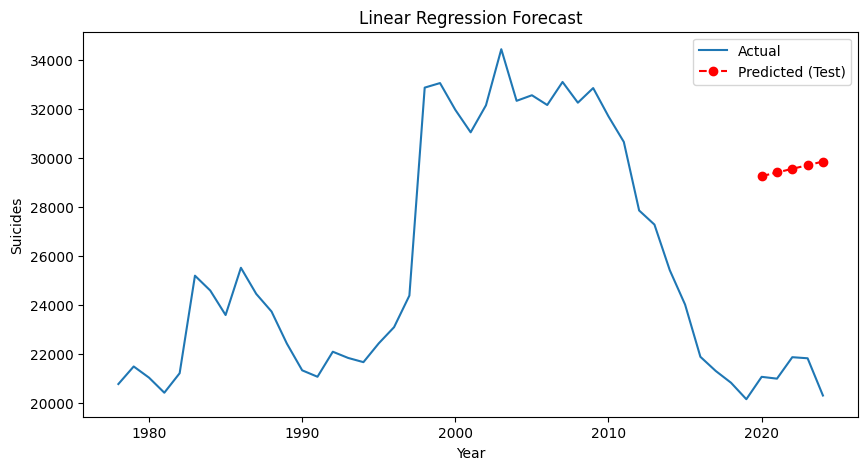

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df.index, df['自殺者_総数'], label="Actual")
plt.plot(X_test, y_pred, 'ro--', label="Predicted (Test)")
plt.xlabel("Year")
plt.ylabel("Suicides")
plt.title("Linear Regression Forecast")
plt.legend()
plt.show()
